In [ ]:
##11月14日
##地理数据可视化cartopy

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
##添加底图
import cartopy.feature as cfeat
import geopandas as gpd##读史量

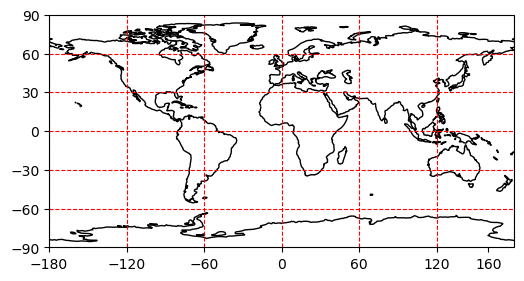

In [4]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (6, 6))
##创建空画布，再调用add_subplot创建有地理信息的画板
ax_geo = fig.add_subplot(1,1,1, projection = proj)
x_ticks = [-180,-120,-60,0,60,120,160]
y_ticks = [-90,-60,-30,0,30,60,90]
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks);
ax_geo.gridlines(linestyle = '--',color='red')
ax_geo.add_feature(cfeat.COASTLINE)

In [5]:
##全球底图在不同投影下的显示效果：
proj1 = ccrs.PlateCarree()  ##等距圆柱投影
proj2 = ccrs.AlbersEqualArea()  ##等面积投影
proj3 = ccrs.Mercator()  ##等角投影


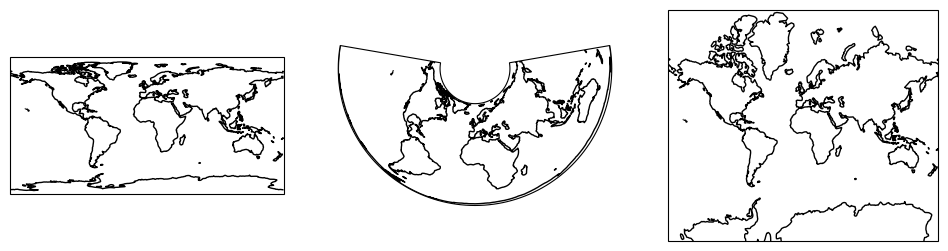

In [6]:
fig = plt.figure(figsize = (12, 3))
ax_geo1 = fig.add_subplot(1,3,1, projection = proj1)
ax_geo1.add_feature(cfeat.COASTLINE)
ax_geo2 = fig.add_subplot(1,3,2, projection = proj2)
ax_geo2.add_feature(cfeat.COASTLINE)
ax_geo3 = fig.add_subplot(1,3,3, projection = proj3)
ax_geo3.add_feature(cfeat.COASTLINE)

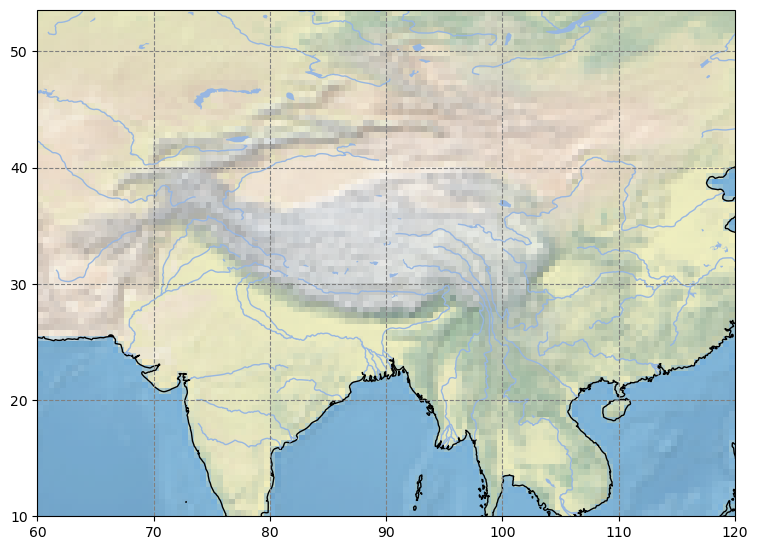

In [7]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (9, 9))
ax_geo = fig.add_subplot(1,1,1, projection = proj)
ax_geo.add_feature(cfeat.COASTLINE)
ax_geo.add_feature(cfeat.LAND)
ax_geo.add_feature(cfeat.OCEAN)
ax_geo.add_feature(cfeat.RIVERS)
ax_geo.add_feature(cfeat.LAKES)
ax_geo.stock_img()
ax_geo.set_extent([60, 120, 10, 50])##精度60-120，纬度10-50
x_ticks = [60,70,80,90,100,110,120]
y_ticks = [10,20,30,40,50]
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks);
ax_geo.gridlines(linestyle = '--',color='gray')

In [8]:
##以上是自带的底图，现在试试自己的数据为底图
path_kunming = 'E:\开源\kunming.gpkg'
kunming_gpd = gpd.read_file(path_kunming)
print(kunming_gpd)
kunming_gpd.head()

   dt_adcode    dt_name ct_adcode ct_name pr_adcode pr_name cn_adcode  \
0     530102        五华区    530100     昆明市    530000     云南省    100000   
1     530103        盘龙区    530100     昆明市    530000     云南省    100000   
2     530111        官渡区    530100     昆明市    530000     云南省    100000   
3     530112        西山区    530100     昆明市    530000     云南省    100000   
4     530113        东川区    530100     昆明市    530000     云南省    100000   
5     530114        呈贡区    530100     昆明市    530000     云南省    100000   
6     530115        晋宁区    530100     昆明市    530000     云南省    100000   
7     530124        富民县    530100     昆明市    530000     云南省    100000   
8     530125        宜良县    530100     昆明市    530000     云南省    100000   
9     530126    石林彝族自治县    530100     昆明市    530000     云南省    100000   
10    530127        嵩明县    530100     昆明市    530000     云南省    100000   
11    530128  禄劝彝族苗族自治县    530100     昆明市    530000     云南省    100000   
12    530129  寻甸回族彝族自治县    530100     昆明市    530000

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71 25.137, 102.72 25.137, ..."
1,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.72 25.045, 102.72 25.045, ..."
2,530111,官渡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.72 25.033, 102.72 25.033, ..."
3,530112,西山区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.51 24.86, 102.51 24.86, 10..."
4,530113,东川区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.8 26.303, 102.81 26.303, 1..."


<Axes: >

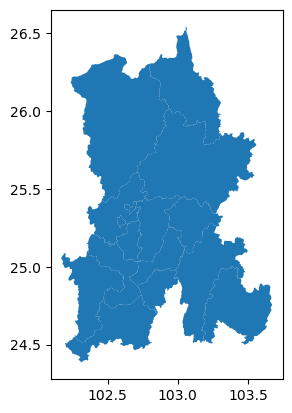

In [9]:
kunming_gpd.plot()
##较简陋

D:\miniconda\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


KeyboardInterrupt: 

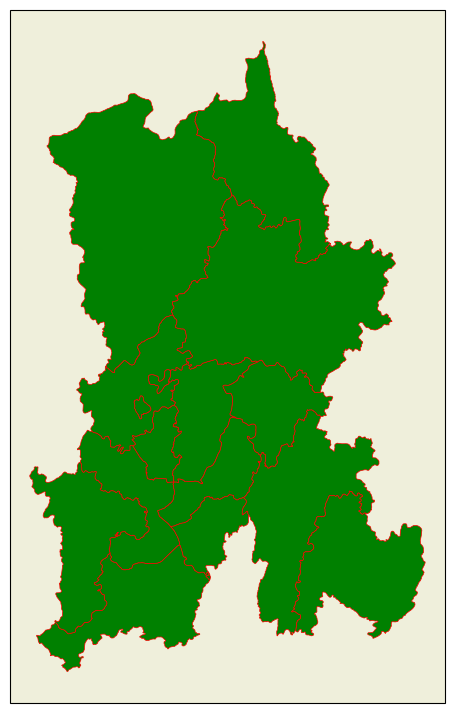

In [10]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (9, 9))
ax_geo = fig.add_subplot(1,1,1, projection = proj)
ax_geo.add_feature(cfeat.LAND)
kunming_gpd.plot(ax = ax_geo, facecolor = 'green',\
                 edgecolor = 'red',linewidth = 0.5)
ax_geo.set_extent([60, 120, 10, 50])##精度60-120，纬度10-50
x_ticks = [60,70,80,90,100,110,120]
y_ticks = [10,20,30,40,50]
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks);
ax_geo.gridlines(linestyle = '--',color='gray')

In [12]:
import rasterio as rio##读栅格
import numpy as np

In [16]:
##栅格数据可视化
path_rsimg = "E:\开源\chenggong_tif_wgs.tif"##应该选wgs84的数据
rsimg_rio = rio.open(path_rsimg)
array_rsimg = rsimg_rio.read()
array_rsimg=array_rsimg.transpose(1,2,0)
array_rsimg_ = np.clip(array_rsimg, 0, 3000)/3000
array_rsimg= np.where(array_rsimg_==0,1, array_rsimg_)
##重新创建一个栅格数据的空间范围，按照左右下上的顺序
extent_rsimg = [rsimg_rio.bounds[0],rsimg_rio.bounds[2],rsimg_rio.bounds[1],rsimg_rio.bounds[3]]
extent_rsimg

[102.69987737807455, 103.00328093798755, 24.694298330329495, 24.99572929743811]

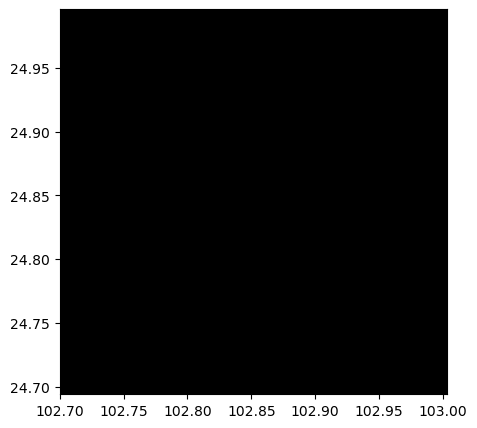

In [17]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
array_rsimg_= array_rsimg_.transpose(1,2,0)
ax.imshow(array_rsimg_[:,:,0:3],extent=extent_rsimg)

In [19]:
ax_geo.add_feature(cfeat.LAND)
ax_geo.set_extent([102,104,2426])

ax_geo.imshow(array_rsimg_[:,:,0:3],extent=extent_rsimg)


ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
##在一个视图下显示多个数据
##在WGS84下显示UTM投影的栅格数据

##首先添加上节课裁剪的两幅影像
path_reg1 = ''
path_reg2 = ''
rsimg1_rio = rio.open(path_reg1)
rsimg2_rio = rio.open(path_reg2)
rsimg2_rio.meta

In [ ]:
proj = ccrs.PlateCarree()
##查看utm数据的元数据是不是48，北半球
proj_utm = ccrs.UTM(zone = 48, southern_hemisphere=False)

fig = plt.figure(figsize = (9, 9))
ax_geo = fig.add_subplot(1,1,1, projection = proj)
##这个范围适用于呈贡区
ax_geo.set_extent([102.7,103,24.7,25])
extent_rsimg1 = [rsimg1_rio.bounds[0],
                 rsimg1_rio.bounds[2],
                 rsimg1_rio.bounds[1],
                 rsimg1_rio.bounds[3]]

extent_rsimg2 = [rsimg2_rio.bounds[0],
                 rsimg2_rio.bounds[2],
                 rsimg2_rio.bounds[1],
                 rsimg2_rio.bounds[3]]

ax_geo.imshow(rsimg1_rio.read(1),extent=extent_rsimg1,transform = proj_utm)
ax_geo.imshow(rsimg2_rio.read(1),extent=extent_rsimg2,transform = proj_utm)
ax_geo.gridlines()
##调整坐标系，坐标范围，格网...